## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

C:\Users\jayyanar\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
row_count = df.shape[0]
print ("The number of rows in dataset is {}".format(row_count))

The number of rows in dataset is 294478


c. The number of unique users in the dataset.

In [5]:
#df.head()
print ("The number Unique userid in dataset is {}".format(df.user_id.drop_duplicates().count()))

The number Unique userid in dataset is 290584


d. The proportion of users converted.

In [6]:
converted = (df.query('converted == 1').count()[0])
total = df.shape[0]

print ("The number of user converted is {}".format(float(converted) /  float(total)))

The number of user converted is 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
C_Group = df.query('group == "control" and landing_page == "new_page"').count()[0]
T_Group = df.query('group == "treatment" and landing_page == "old_page"').count()[0]

print ("Number of times not lined up is {}".format(C_Group+T_Group))

Number of times not lined up is 3893


f. Do any of the rows have missing values?

In [8]:
#df.isnull().sum().sum()
miss = df.isnull().values.any()

print ("Missing Values : {}".format(miss))

Missing Values : False


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

In [10]:
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [11]:
df.to_csv('ab_updated_data.csv', index=False)

In [12]:
df2 = pd.read_csv('ab_updated_data.csv')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
# Total Number of rows
df2.shape[0]
print ("Total Number of row : {}".format(df2.shape[0]))

Total Number of row : 290585


In [15]:
# Number of unique rows
df2['user_id'].nunique()
print ("Total Number of Unique row : {}".format(df2['user_id'].nunique()))

Total Number of Unique row : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
dup_id = df2[df2.duplicated(['user_id'], keep=False)]['user_id'].reset_index()

In [17]:
print ("The user id which repeated is : {}".format(dup_id.user_id[0]))

The user id which repeated is : 773192


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
print ("Row Count before remove duplicate user_id : {} ".format(df2.shape[0]))
df2.drop_duplicates('user_id', keep='first' ,inplace=True)
print ("Row Count after remove duplicate user_id: {} ".format(df2.shape[0]))

Row Count before remove duplicate user_id : 290585 
Row Count after remove duplicate user_id: 290584 


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
converted = (df2.query('converted == 1').count()[0])
total = df2.shape[0]

print ("The number of user converted is {}".format(float(converted) /  float(total)))

The number of user converted is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
control_converted = (df2.query('group == "control" and converted == 1').count()[0])
control_total = (df2.query('group == "control"').count()[0])
control_prob = float(control_converted) /  float(control_total)
print ("Probability of Control Group converted is {}".format(control_prob))

Probability of Control Group converted is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treatment_converted = (df2.query('group == "treatment" and converted == 1').count()[0])
treatment_total = (df2.query('group == "treatment"').count()[0])
treatment_prob = float(treatment_converted) /  float(treatment_total)
print ("Probability of Treatment Group converted is {}".format(treatment_prob))

Probability of Treatment Group converted is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [23]:
newpage = (df2.query('landing_page == "new_page"').count()[0])
total_page = df2.shape[0]

print ("The probability of receiving the new page is {}".format(float(newpage) /  float(total_page)))

The probability of receiving the new page is 0.5000619442226688


In [24]:
#print ("The Duration of testing is betweek {} to  {}".format(df2.timestamp.min(),df2.timestamp.max()))

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

# **Answers**

<br>
**1) The Probabilty of receiving New page is almost equal to oldpage. **
<br>
**2) The convertion rate for both treatment(newpage) and control(oldpage) is 11% and 12% respectively not provide a sufficent evidence that new treatment page leads to more conversation.**
<br>
**3) The duration of testing is lessthan one month , The more duration will provide better dataset for analysis and data based decision. **
<br>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**Null Hypothesis ** : $$H_0: p_{old} \geq p_{new} $$
The difference between conversion rate of older page is better than newer page for given user population

<br>

** Alternative-hypothesis ** : $$H_1: p_{old} \lt p_{new} $$ 
The difference between conversion rate of older page is low than newer page for given user population

<br>

** In other words  **

** Null Hypothesis ** : $$ H_0: p_{new} - p_{old} \leq 0$$
The Conversion rate of old page is greater than zero


** Alternative-hypothesis ** : $$H_1: p_{new} - p_{old} \gt 0$$
--- The Conversion rate of new page is greater than zero

** Type 1 Error Rate ** :  $$\alpha = 0.05 $$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
# Calculate Probability of new landing page
p_new = df2['converted'].mean()
print ("convert rate for p_new under the null :{} ".format(round(p_new, 4)))

convert rate for p_new under the null :0.1196 


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
# Calculate Probability of old landing page
p_old = df2['converted'].mean()
print ("convert rate for p_old under the null :{} ".format(round(p_old, 4)))

convert rate for p_old under the null :0.1196 


c. What is $n_{new}$?

In [27]:
# Number of populate for new Page
nnew = df2.query('landing_page == "new_page"').count()[0]
print ("The population of Newpage is : {}".format(nnew))

The population of Newpage is : 145310


d. What is $n_{old}$?

In [28]:
# Number of populate for old Page
nold = df2.query('landing_page == "old_page"').count()[0]
print ("The population of Oldpage is : {}".format(nold))

The population of Oldpage is : 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# Mean Value of pnew and pold
pmean = np.mean([p_new,p_old])
round (pmean, 4)

0.1196

In [30]:
# Finding Null Value for new
# Generate the random sample using the Population of newpage and propobaility of Converted newpage
# a = [1,0] probability which we like to solve
# size = nnew size
# p = probabilty of of null if 1 and 0

#new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
new_page_converted = np.random.choice([1,0],size=nnew,p=[pmean, (1-pmean)])

#new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
new_page_converted.mean()

0.11957883146376712

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([1,0],size=nold,p=[pmean, (1-pmean)])
old_page_converted.mean()

0.11991133995071382

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
obs_mean = new_page_converted.mean() - old_page_converted.mean()
print ("The Value of  pnew_pold is {}".format(obs_mean))

The Value of  pnew_pold is -0.00033250848694670043


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
p_diffs =[]
for _ in range(10000):
    new_page_converted = np.random.choice([1,0],size=nnew,p=[pmean, (1-pmean)])
    old_page_converted = np.random.choice([1,0],size=nold,p=[pmean, (1-pmean)])
    diff_mean = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

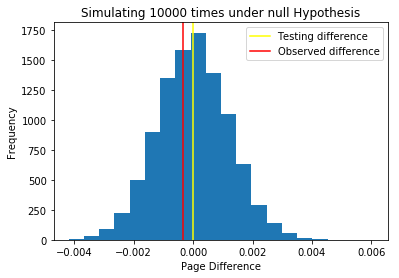

In [34]:
p_array = np.array(p_diffs)
plt.hist(p_array, bins=20)
plt.axvline(x=(np.mean(p_diffs)), color='yellow', label="Testing difference")
plt.axvline(x=obs_mean, color='red', label="Observed difference")
plt.xlabel("Page Difference")
plt.ylabel("Frequency")
plt.title("Simulating 10000 times under null Hypothesis")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
Actual_diff = treatment_prob - control_prob
prob_diff = (Actual_diff < p_array).mean()

print ("The Probability of conversion for old page : {}".format((control_prob*100)))
print ("The Probability of conversion for new page : {}".format((treatment_prob*100)))
print ("Actual difference observed is : {} ".format(Actual_diff))
#print ("The p_diff mean Value is : {}% ".format(prob_diff * 100))
print ("The Proportion of p_diffs (10000 Simulation) greater than actual differece is :{}%".format(prob_diff*100))

The Probability of conversion for old page : 12.03863045004612
The Probability of conversion for new page : 11.880806551510565
Actual difference observed is : -0.0015782389853555567 
The Proportion of p_diffs (10000 Simulation) greater than actual differece is :90.9%


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

# **Answers**

<br>
**1) In the above hypothesis we are trying to prove "Null Hypothesis is True". **
<br>
**2) Calculated difference between value for p_new and p_old for observed difference; also we done random sampling of 10000 and found the proportion which is greater than observed difference value.**
<br>
**3) The proportion of samples greater than observed value is 90% and morethan allowed alpha error rate of 5%. This clearly indicated that the new page is not as significant than old page. Indicate new page is less effective.**
<br>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [37]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

#convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
#convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = nold
n_new = nnew

print ("Total old Page Converted : {}".format(convert_old))
print ("Total Number of old Page : {}".format(nold))

print ("Total new Page Converted : {}".format(convert_new))
print ("Total Number of new Page : {}".format(nnew))

Total old Page Converted : 17489
Total Number of old Page : 145274
Total new Page Converted : 17264
Total Number of new Page : 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
#http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
#Help to calculate p_value easily using statsmodelapi
zstat_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
#zstat_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old])
print(zstat_score, p_value)
print("The Pvalue for null Hypothesis is {}".format(p_value))

1.31092419842 0.905058312759
The Pvalue for null Hypothesis is 0.9050583127590245


In [39]:
zstat1_score, p_value_twosided = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='two-sided')
print("The Pvalue for Two sided for alternate Hypothesis is {}".format(p_value_twosided))

The Pvalue for Two sided for alternate Hypothesis is 0.18988337448195103


In [40]:
import scipy
p_values_one_sided = scipy.stats.norm.cdf(abs(zstat_score)) #cumulative distribution function
p_values_two_sided = scipy.stats.norm.sf(abs(zstat_score))*2 #twosided
critical_value = scipy.stats.norm.ppf(1-(0.05))

print("The Pvalue for Two sided for alternate Hypothesis is {}".format(p_values_two_sided))

The Pvalue for Two sided for alternate Hypothesis is 0.18988337448195103


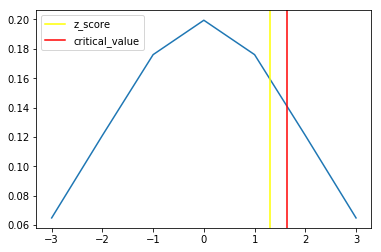

The Z_score : 1.3109241984234394
The critical Value : 1.6448536269514722


In [41]:
x_val = [-3,-2,-1,0,1,2,3]
x_val.sort()
x_val_mean = np.mean(x_val)
x_val_std = np.std(x_val)

pdf = scipy.stats.norm.pdf(x_val, x_val_mean, x_val_std)
plt.plot(x_val, pdf) # including h here is crucial
plt.axvline(x=zstat_score, color='yellow', label="z_score")
plt.axvline(x=critical_value, color='red', label="critical_value")


plt.legend()
plt.show()

print("The Z_score : {}".format(zstat_score))
print("The critical Value : {}".format(critical_value))

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

# **Answers**

<br>
**1) In the above hypothesis we are trying to prove "Null Hypothesis is True" using the pvalue. **
<br>
**2) The pvalue is almost similar to values derived from  j and k**
<br>
**3) Using confidence interval value we confirmed that there is no sufficent difference to reject the null Hypothesis**
<br>
**4) Z scores, or standard scores, indicate how many standard deviations an observation is above or below the mean.The Z score reflects a standard normal deviate - the variation of across the standard normal distribution, which is a normal distribution with mean equal to zero and standard deviation equal to one. Can Calculate Z score: Z = (x-sample mean)/sample standard deviation. **
<br>
**5) We can derive pvalue (cumulate distribution and two-sided),confidence interval  from z-score using scipy as above and confidence interval below the zscore confirm that "Null Hypohesis is true" **
<br>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#** Answer **

** Logistic Regression **

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])
df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])
res = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-03-24 12:06 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

# ** Answers **

<br>
** As noted in Part II - m **
<br>
** The Pvalue for null Hypothesis is 0.9050583127590245 **
** The Pvalue for Two sided for alternate Hypothesis is 0.18988337448195103**
<br>
<br>
** The Logit regression output value is two tailed p_value **
<br>
** The one-tail P value is half the two-tail P value - (prediction in the opposite direction) **
<br>
** The two-tail P value is twice the one-tail P value. since made prediction in the opposite direction, the p-value would have been  (1 - 0.18/2 ) = 0.91**
<br>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

# ** Answers **
<br>
** Advantage : ** The factors consided for regression model which influence the conversion rate like a) duration conversion rate is good (weekday or weekend b) request for conversion from mobile app or desktop browser
<br>
** Disadvantage ** : Adding more factors may leads to no co-relation between them.
<br>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [47]:
df_new.isnull().values.any()

False

In [48]:
### Create the necessary dummy variables for landing page
df_new[['action_new_page','action_old_page']] = pd.get_dummies(df_new['landing_page'])
df_new = df_new.drop('action_old_page', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,action_new_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1


In [49]:
### Create the necessary dummy variables for landing page
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,action_new_page,CA,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0


In [50]:
df_Country = df_new.groupby('country').mean()
df_Country['converted']

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

# ** TESTING I **

In [51]:
### Fit Your Linear Model And Obtain the Results
import statsmodels.api as sm
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','UK','US']])
res = log_mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-03-24 12:06 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [52]:
print ("The Number of time the 'UK' Conversion is better than 'CA' : {} ".format(np.exp(0.0507)))
print ("The Number of time the 'US' Conversion is better than 'CA' : {} ".format(np.exp(0.0408)))

The Number of time the 'UK' Conversion is better than 'CA' : 1.052007243765014 
The Number of time the 'US' Conversion is better than 'CA' : 1.0416437559600236 


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

# ** TESTING II **

In [53]:
df_new['intercept'] = 1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','action_new_page','UK','US','CA']])
res = log_mod.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 22


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                 Logit               No. Iterations:      22.0000    
Dependent Variable:    converted           Pseudo R-squared:    0.000      
Date:                  2018-03-24 12:07    AIC:                 212781.1253
No. Observations:      290584              BIC:                 212823.4439
Df Model:              3                   Log-Likelihood:      -1.0639e+05
Df Residuals:          290580              LL-Null:             -1.0639e+05
Converged:             1.0000              Scale:               1.0000     
---------------------------------------------------------------------------
                 Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
---------------------------------------------------------------------------
intercept       -1.4997 186557.0198 -0.0000 1.0000 -365646.5396 365643.5402
action_new_page -0.0149      0.0114 -1.3069 0.1912      -0.0374      0.0075
UK              -0.4797 186557.0198 -0.0000 1.0000 -365645.5196 365644.5602
US              -0.4896 186557.0198 -0.0000 1.0000 -365645.5294 365644.5503
CA              -0.5303 186557.0198 -0.0000 1.0000 -365645.5702 365644.5095
===========================================================================

"""

# ** Observation **
<br>
** Testing I ** : Based on the pvalue identified the corelation and checked the conversion rate of UK and US is approproximately 1.04 times better than CA
<br>
** Testing II ** : With added parameter of interaction between page , The pvalue is more higher and shows no co-relation.
<br>

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.